# Mini project 2

## Requirements
Download the data related to one of the “small/medium-scale protein-protein interactions” from here. Implement the following tasks/answer the questions:

1.    Build the corresponding network (G) with Networkx

2.    What are number of nodes, number of edges and the average degree of the network?

3.    What is the density of the network.

4.    Find the minimum spanning tree in G and draw it.

5.    Draw the degree distribution histogram.

6.    Find the largest connected component of the network  (LC) and answer the following questions about LC (or implement the tasks):

Draw LC.
What is its diameter?
What is the center of LC?
What is the number of clique communities with 3 nodes?
(Optional, for 3 extra points) What is the name of the protein that changing its status has potentially the biggest effect on the rest of the network?


In your final report you should include the following information:

- A brief description of the problem

- Your python code for every step

- Plots


## Drawing the network
First I read the file with my data. I am building the network using NetworkX and then I plot the network.

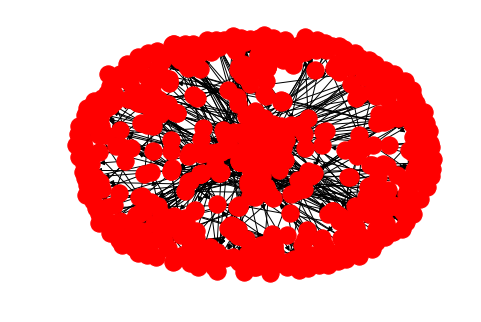

In [167]:
import networkx as nx
import matplotlib.pyplot as plt

# undirected graph
g = nx.read_edgelist("DM-LC.txt",create_using=nx.Graph(), nodetype=str, data=(('weight', float),))

# directed graph
gx = nx.read_edgelist("DM-LC.txt",create_using=nx.DiGraph(), nodetype=str, data=(('weight', float),))
# number of self-nodes
g.selfloop_edges()

# draw the directed network
nx.draw(gx)

## Checking number of nodes, edges and average degree

What are number of nodes, number of edges and the average degree of the network?

In [168]:
# Checking the number of nodes
len(g)

658

In [169]:
# Checking the number of edges
g.number_of_edges()

1129

The degree of a node is the number of edges connected to it. 

In [170]:
# Checking the average degree of the network
# average degree = sum of the degrees/number of nodes
ave = g.number_of_edges()/len(g)
print (ave)

1.71580547112462


In [162]:
# Checking the density of the network
nx.density(g)

0.005223152119100822

## The minimum spanning tree
A minimum spanning tree is a subset of the edges of a connected, edge-weighted (un)directed graph that connects all the vertices together, without any cycles and with the minimum possible total edge weight. 

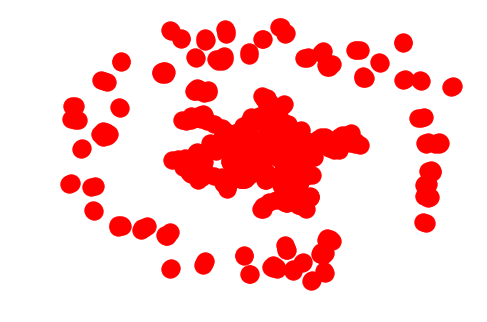

In [178]:
# Building the MST
mst = nx.minimum_spanning_tree(g)
nx.draw(mst)
# edges missing

## Degree distribution histogram
The following code is copied from: https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html. 

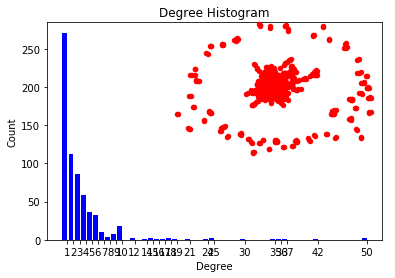

In [156]:

import collections

degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(g), key=len, reverse=True)[0]
pos = nx.spring_layout(g)
plt.axis('off')
nx.draw_networkx_nodes(g, pos, node_size=20)
nx.draw_networkx_edges(g, pos, alpha=0.4)

plt.show()

## The largest connected component of the network (LC) 
Draw the LC. 

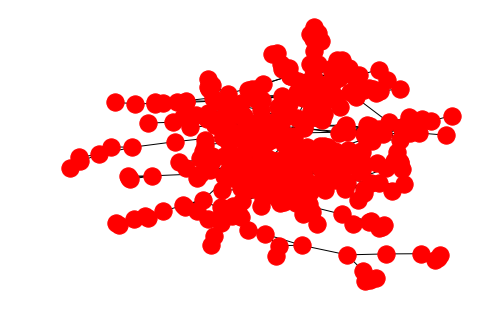

In [157]:
# drawing the LC
gc = max(nx.connected_component_subgraphs(g), key=len)
nx.draw(gc)